In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv('../data/cleaned/data_final.csv', )
data = data.drop(columns="url")
data.head()


,price,zone,neighborhood,built_area,usable_area,bedrooms,bathrooms,floor,exterior,elevator,garage,storage_room,balcony,new,condition,year,agency,consumption_label,emissions_label,description
0,440000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",76.0,70.000000,2,2,3.0,exterior,True,True,True,True,False,Buen estado,2025.0,ORDUNTE Inmobiliaria,A,A,"GASTOS DE GESTIÓN de 1,5 por ciento + IVA a ca..."
1,442000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",82.0,67.104025,2,2,1.0,exterior,True,True,False,True,True,Nuevo,2025.0,LOIOLA GESTIÓN INMOBILIARIA,A,A,La nueva promoción de Loiola se compone de 42 ...
2,381000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",58.0,44.045770,1,1,4.0,exterior,True,True,False,True,True,Nuevo,2025.0,LOIOLA GESTIÓN INMOBILIARIA,A,A,La nueva promoción de Loiola se compone de 42 ...
3,575000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",104.0,88.240759,3,2,1.0,exterior,True,True,False,True,True,Nuevo,2025.0,LOIOLA GESTIÓN INMOBILIARIA,A,A,La nueva promoción de Loiola se compone de 42 ...
4,306000.0,deusto,"La Ribera-Ibarrekolanda, Bilbao",62.0,47.888812,1,1,1.0,exterior,True,True,False,False,True,Nuevo,2025.0,Loiola,A,A,"60 viviendas de obra nueva de 1, 2 y 3 habitac..."


In [2]:
data.info()
fetures = data.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              1230 non-null   float64
 1   zone               1230 non-null   object 
 2   neighborhood       1230 non-null   object 
 3   built_area         1230 non-null   float64
 4   usable_area        1230 non-null   float64
 5   bedrooms           1230 non-null   int64  
 6   bathrooms          1230 non-null   int64  
 7   floor              1230 non-null   float64
 8   exterior           1230 non-null   object 
 9   elevator           1230 non-null   bool   
 10  garage             1230 non-null   bool   
 11  storage_room       1230 non-null   bool   
 12  balcony            1230 non-null   bool   
 13  new                1230 non-null   bool   
 14  condition          1230 non-null   object 
 15  year               1230 non-null   float64
 16  agency             1230 

In [16]:

columnastring = ["description"]
data[columnastring] = data[columnastring].astype('string') 
columnascategory = ["zone","neighborhood","exterior","condition","agency","consumption_label","emissions_label"]
data[columnascategory] = data[columnascategory].astype('category')
data["year"] = data["year"].round()
data_clustering = data.drop(columns=["description","agency" ])
data_clustering.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   price              1230 non-null   float64 
 1   zone               1230 non-null   category
 2   neighborhood       1230 non-null   category
 3   built_area         1230 non-null   float64 
 4   usable_area        1230 non-null   float64 
 5   bedrooms           1230 non-null   int64   
 6   bathrooms          1230 non-null   int64   
 7   floor              1230 non-null   float64 
 8   exterior           1230 non-null   category
 9   elevator           1230 non-null   bool    
 10  garage             1230 non-null   bool    
 11  storage_room       1230 non-null   bool    
 12  balcony            1230 non-null   bool    
 13  new                1230 non-null   bool    
 14  condition          1230 non-null   category
 15  year               1230 non-null   float64 
 16  consum

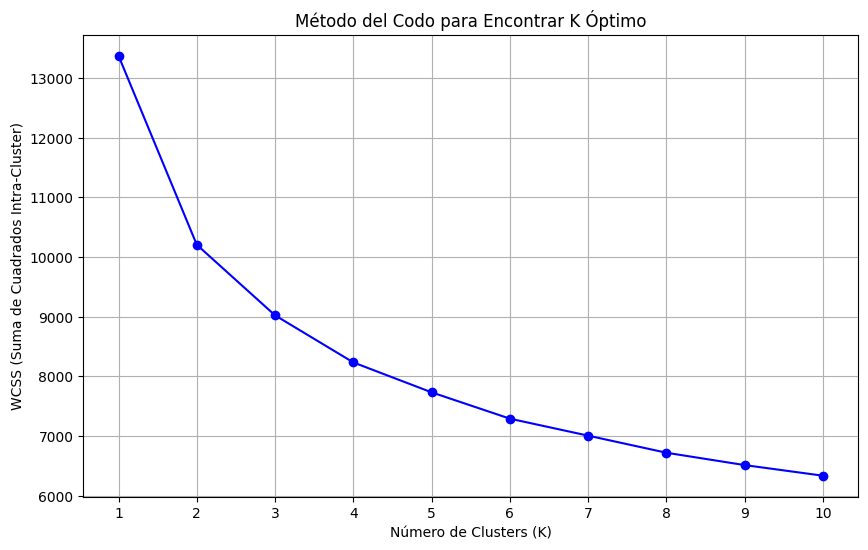

K=2: Silhouette Score = 0.2960
K=3: Silhouette Score = 0.1466
K=4: Silhouette Score = 0.1603
K=5: Silhouette Score = 0.1539
K=6: Silhouette Score = 0.1487
K=7: Silhouette Score = 0.1283
K=8: Silhouette Score = 0.1207
K=9: Silhouette Score = 0.1181
K=10: Silhouette Score = 0.1145
--- Resultado del Análisis de Silueta ---


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

numerical_cols = ['price', 'built_area', 'usable_area', 'bedrooms', 'bathrooms', 'floor', 'year']
categorical_cols = list(data_clustering.select_dtypes(include=['category']).columns)
boolean_cols = list(data_clustering.select_dtypes(include=['bool']).columns)

# A. Codificación One-Hot para Categóricas
data_processed = pd.get_dummies(data_clustering, columns=categorical_cols, drop_first=True)

# B. Convertir Booleanas a Entero (0/1)
for col in boolean_cols:
    data_processed[col] = data_processed[col].astype(int)

# C. Escalado (Estandarización) de Columnas Numéricas
scaler = StandardScaler()
data_processed[numerical_cols] = scaler.fit_transform(data_processed[numerical_cols])

X = data_processed.copy()

# ENCONTRAR K ÓPTIMO ---
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Opcional: Visualización del Método del Codo (guarda el plot)
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='blue')
plt.title('Método del Codo para Encontrar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Suma de Cuadrados Intra-Cluster)')
plt.xticks(K_range)
plt.grid(True)
plt.show()  

#NO SE VE NADA CLARO CUAL ELEGIR, PROBAMOS SILHOUETTE


silhouette_scores = {}
K_range = range(2, 11) 


for k in K_range:
    # Entrenar K-Means
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    # Calcular el Silhouette Score
    score = silhouette_score(X, cluster_labels)
    silhouette_scores[k] = score
    print(f"K={k}: Silhouette Score = {score:.4f}")

# Encontrar el K con la puntuación más alta
K_optimal_silhouette = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[K_optimal_silhouette]

print("--- Resultado del Análisis de Silueta ---")
#RESULTADOS MUY IGUALADOS ENTRE K = 3 Y K = 6 COMO 2 NOS PARECE MUY POCO OPTAMOS POR QUE ES LA QUE MAS VALOR SILHOUTTE QUE ES LA 4

K_OPTIMAL = 4



In [20]:
# --- 4. APLICACIÓN DE K-MEANS CON K ELEGIDO ---

kmeans_final = KMeans(n_clusters=K_OPTIMAL, init='k-means++', random_state=42, n_init=10)
data_clustering['Cluster'] = kmeans_final.fit_predict(X)

# --- 5. ANÁLISIS DE RESULTADOS ---

print("\n--- Resultados del Clustering K-Means ---")
print(f"Número óptimo de clusters (K) elegido: {K_OPTIMAL}")

print("\nConteo de propiedades por Cluster:")
print(data_clustering['Cluster'].value_counts().sort_index())

print("\nValores medios de características numéricas por Cluster:")
print(data_clustering.groupby('Cluster')[numerical_cols].mean().round(2))

categorical_cols = ["zone", "neighborhood", "exterior", "condition", "consumption_label", "emissions_label"]

print("\n### Distribución de Frecuencias de Variables Categóricas por Cluster ###")

for col in categorical_cols:
    print(f"\n--- Variable: {col.upper()} ---")
    
    # Crea una tabla cruzada: Cluster vs. Categoría
    cross_tab = pd.crosstab(data_clustering['Cluster'], data_clustering[col])
    
    # Normaliza por fila (por Cluster) para ver los porcentajes
    # Esto te dice qué porcentaje de cada Cluster cae en cada categoría
    normalized_cross_tab = cross_tab.apply(lambda r: r/r.sum(), axis=1)
    
    # Muestra los porcentajes redondeados
    print(normalized_cross_tab.round(3).to_string())



--- Resultados del Clustering K-Means ---
Número óptimo de clusters (K) elegido: 4

Conteo de propiedades por Cluster:
Cluster
0    501
1    450
2    120
3    159
Name: count, dtype: int64

Valores medios de características numéricas por Cluster:
              price  built_area  usable_area  bedrooms  bathrooms  floor  \
Cluster                                                                    
0         263229.75       72.89        66.15      2.30       1.10   3.65   
1         570314.95      126.29       114.03      3.47       2.12   4.02   
2        1072257.19      268.67       244.70      5.77       3.20   3.52   
3         437267.10       96.62        79.17      2.32       1.81   3.04   

            year  
Cluster           
0        1945.53  
1        1962.40  
2        1946.62  
3        2021.87  

### Distribución de Frecuencias de Variables Categóricas por Cluster ###

--- Variable: ZONE ---
zone     abando-albia  basurto-zorroza  begona-santutxu  casco-viejo  deusto  ibaio

FALTA EVALUAR ESTE METODO Y PROBAR CON OTROS